In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [91]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/ac/6d884eba6d30196baf8f8284448f4d5388681f386f1150ad2d54398bc33a/tensorflow-2.15.0-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata
  Obtaining dependency information for tensorflow-cpu-aws==2.15.0 from https://files.pythonhosted.org/packages/e5/f8/cb3f769311ee80ed8d6a3f0c181c03b3dfffa98809005e2d63faf041f377/tensorflow_cpu_aws-2.15.0-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57

In [108]:
df = pd.read_csv('realest.csv')

In [62]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [8]:
df.shape

(157, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [10]:
df.nunique()

Price         47
Bedroom        7
Space        137
Room           7
Lot           11
Tax          138
Bathroom       5
Garage         4
Condition      2
dtype: int64

In [12]:
df["Bedroom"].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  7., nan])

In [13]:
df["Condition"].unique()

array([ 0.,  1., nan])

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [109]:
for col in df.columns:
    if col in ["Space","Tax","Lot"]:
        df[col]=df[col].fillna(df[col].mean())
    else :
        df[col]=df[col].fillna(df[col].median())

In [17]:
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

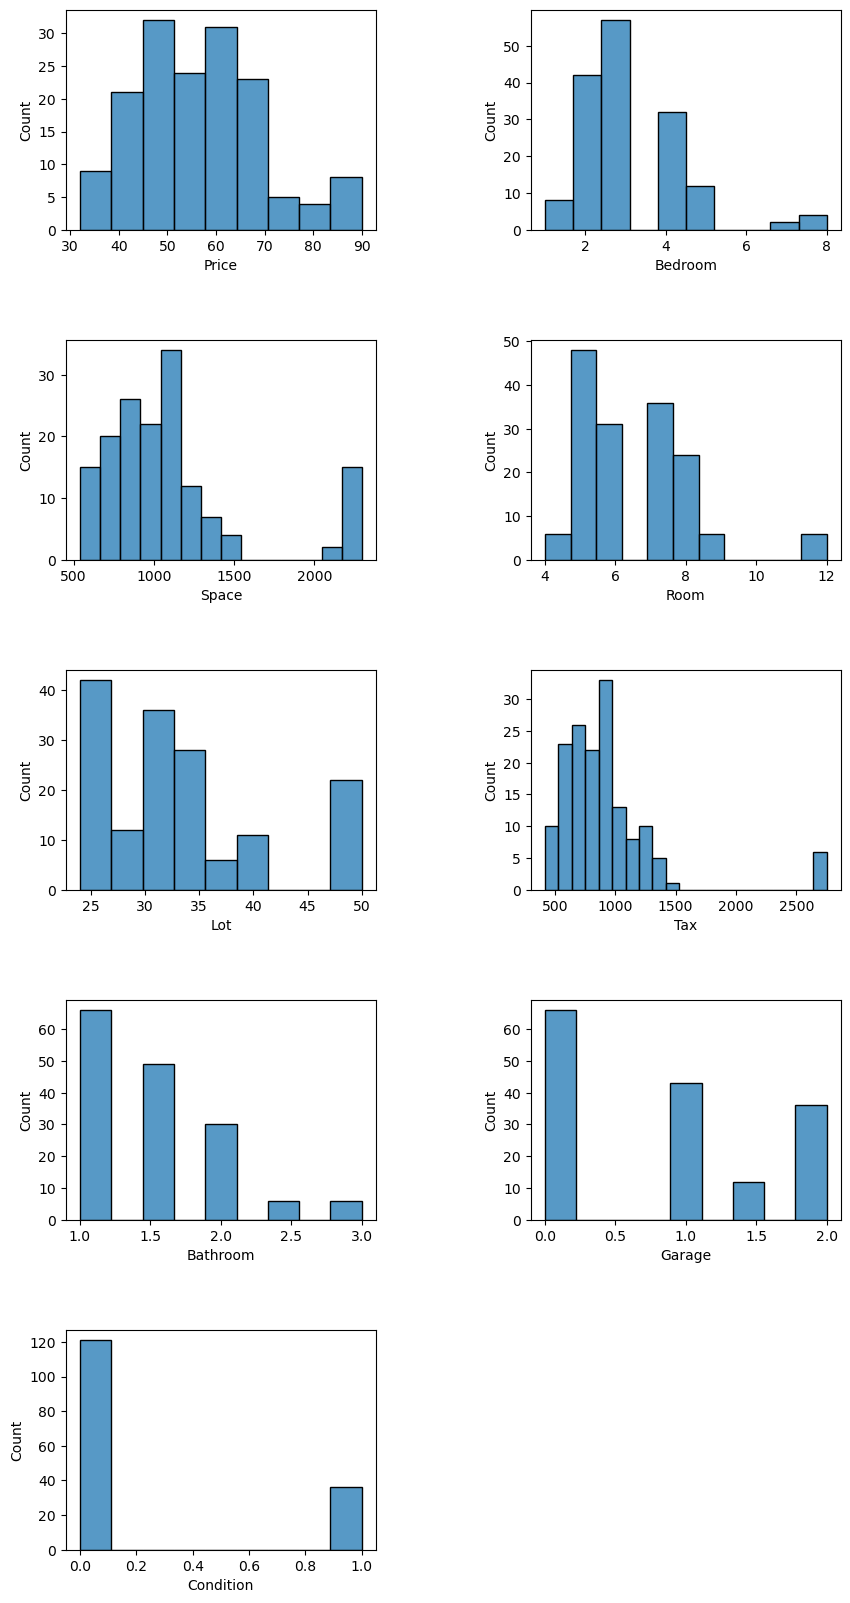

In [35]:
plt.figure(figsize=(10,20))
i=1
for col in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df,x=col)
    i=i+1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<Axes: >

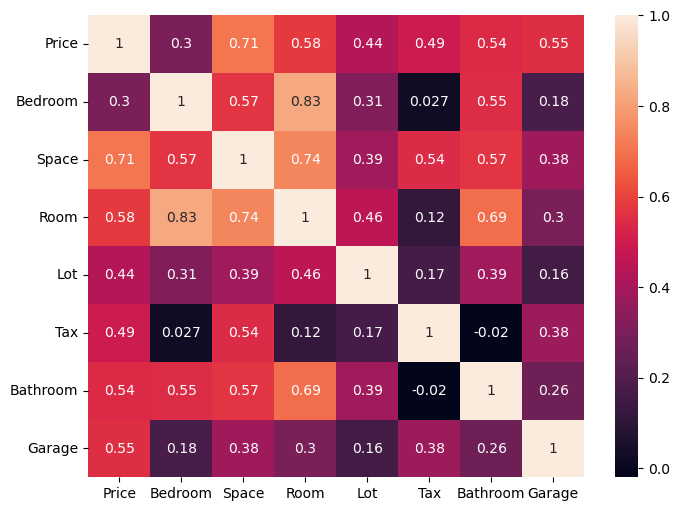

In [36]:
plt.figure(figsize=(8,6))
corr = df.drop(columns="Condition").corr()
sns.heatmap(corr ,annot=True)

In [64]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [65]:
df.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

In [110]:
y = df["Price"]
X = df.drop("Price", axis=1)

ct = ColumnTransformer(transformers=[
    ('col_tnf', MinMaxScaler(),['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'])
],remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [120]:
X_train

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
136,4.0,1424.0,8.0,32.808219,621.0,1.0,1.0,1.0
55,3.0,1049.0,6.0,24.000000,982.0,1.5,2.0,0.0
124,4.0,744.0,6.0,25.000000,531.0,1.0,0.0,0.0
84,5.0,1370.0,8.0,30.000000,696.0,1.0,1.0,1.0
105,1.0,729.0,5.0,33.000000,1054.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
71,4.0,1095.0,7.0,25.000000,530.0,1.5,0.0,0.0
106,2.0,942.0,5.0,35.000000,880.0,1.5,1.0,0.0
14,4.0,1325.0,8.0,50.000000,1287.0,1.5,0.0,0.0
92,4.0,1382.0,8.0,50.000000,1267.0,1.5,0.0,0.0


In [104]:
X_train.shape, y_train.shape

((125, 8), (125,))

In [105]:
X_train[0]

array([0.42857143, 0.50398633, 0.5       , 0.33877766, 0.08791685,
       0.        , 0.5       , 1.        ])

In [111]:
step2 = LinearRegression()

pipe = Pipeline([
    ('step1',ct),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5932430349163025
MAE 7.113277446798557


In [112]:
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',ct),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7555507876998634
MAE 4.777688717532468


In [128]:


ct = ColumnTransformer(transformers=[
    ('col_tnf', MinMaxScaler(),[0,1,2,3,4,5,6,7])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',ct),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.837620392773704
MAE 4.192187500000001


In [126]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

ct = ColumnTransformer(transformers=[
    ('col_tnf', MinMaxScaler(),[0,1,2,3,4,5,6,7])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',ct),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8883390243349164
MAE 3.31228566154916


In [113]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3)

# Build the model
model = tf.keras.Sequential([
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model
model.fit(X_train_normal, y_train,validation_data = (X_test_normal, y_test),batch_size=16,
                          callbacks=[callback], epochs=500, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 17ms/step - loss: 56.4950 - mae: 56.4950 - val_loss: 55.9033 - val_mae: 55.9033
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 56.3031 - mae: 56.3031 - val_loss: 55.6875 - val_mae: 55.6875
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 56.0708 - mae: 56.0708 - val_loss: 55.4262 - val_mae: 55.4262
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 55.7899 - mae: 55.7899 - val_loss: 55.1107 - val_mae: 55.1107
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 55.4529 - mae: 55.4529 - val_loss: 54.7340 - val_mae: 54.7340
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 55.0533 - mae: 55.0533 - val_loss: 54.2905 - val_mae: 54.2905
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 54.5858 - mae: 54.5858 - val_loss: 53.7754 - val_mae: 53.7754
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - los

In [129]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [115]:
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.000000,5.0,39.000000,652.000000,1.5,0.0,0.0
1,55.0,2.0,815.000000,5.0,33.000000,1000.000000,1.0,2.0,1.0
2,56.0,3.0,900.000000,5.0,35.000000,897.000000,1.5,1.0,0.0
3,58.0,3.0,1007.000000,6.0,24.000000,964.000000,1.5,2.0,0.0
4,64.0,3.0,1100.000000,7.0,50.000000,1099.000000,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.000000,5.0,27.000000,911.707483,1.0,0.0,1.0
153,43.0,2.0,593.000000,4.0,30.000000,465.000000,2.0,1.0,0.0
154,53.0,3.0,716.000000,6.0,30.000000,585.000000,1.0,2.0,1.0
155,62.0,4.0,951.000000,7.0,30.000000,895.000000,2.0,1.0,0.0
